In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from tqdm import tqdm
# Plot loss function over learning iterations
import numpy as np
import pandas as pd
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)



In [2]:
# Load the training dataset
train_data = pd.read_csv('../archive/sign_mnist_train.csv')


In [3]:
# Separate the data (features) and the classes
X_train = train_data.drop(["label"], axis=1)  # Features (all columns except the first one)
X_train = X_train / 255.0
y_train = train_data['label']   # Target (first column)

# Create validation dataset by splitting training data (20% for validation)
X_train, X_validate, y_train, y_validate = train_test_split(
    X_train, y_train,
    test_size=0.2,
    random_state=42,
    shuffle=True,
    stratify=y_train   # ← MUST HAVE THIS
)

Learning Rate: 1e-05| Validation Accuracy: 0.7844| F1-Score: 0.7828| Total Iterations: 400
Learning Rate: 2e-05| Validation Accuracy: 0.8791| F1-Score: 0.8784| Total Iterations: 400
Learning Rate: 0.0001| Validation Accuracy: 0.9993| F1-Score: 0.9993| Total Iterations: 400
Learning Rate: 0.001| Validation Accuracy: 1.0000| F1-Score: 1.0000| Total Iterations: 146
Learning Rate: 0.002| Validation Accuracy: 0.9993| F1-Score: 0.9993| Total Iterations: 156
Learning Rate: 0.01| Validation Accuracy: 0.6190| F1-Score: 0.6144| Total Iterations: 162


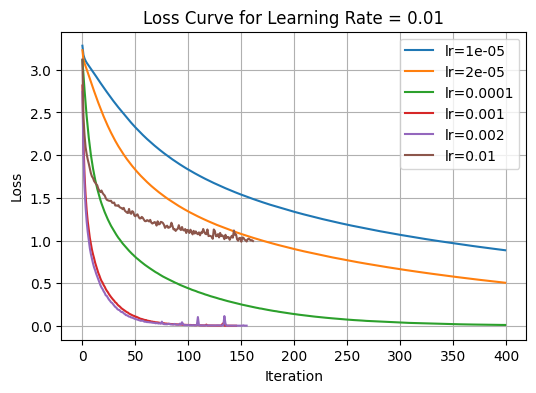

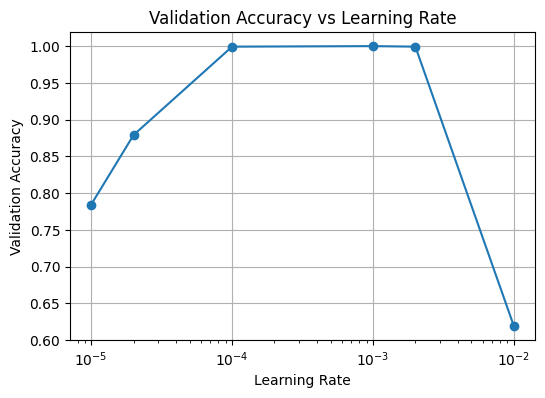

In [7]:
# Hyperparameter tuning for learning rate with fixed hidden layer size = 64

learning_rates = [1e-5,2e-5, 1e-4, 0.001,0.002, 0.01]

val_accs = []
f1_scores = []
loss_curves = []
plt.figure(figsize=(6,4))

for i, lr in enumerate(learning_rates):
    model = MLPClassifier(
        hidden_layer_sizes=(64,),
        learning_rate_init=lr,
        max_iter=400,
        random_state=42
    )

    model.fit(X_train, y_train)

    # Record metrics
    val_acc = model.score(X_validate, y_validate)
    f1_score_val = f1_score(y_validate, model.predict(X_validate), average='weighted')
    f1_scores.append(f1_score_val)
    val_accs.append(val_acc)

    print(f'Learning Rate: {lr}| Validation Accuracy: {val_acc:.4f}| F1-Score: {f1_score_val:.4f}| Total Iterations: {model.n_iter_}')

    # Plot the loss curve
    plt.plot(model.loss_curve_, label=f"lr={lr}")
    # store in a list the loss values for later use
    plt.title(f"Loss Curve for Learning Rate = {lr}")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

plt.show()
# Plot Validation Accuracy vs Learning Rate
plt.figure(figsize=(6,4))
plt.plot(learning_rates, val_accs, marker='o')
plt.xscale("log")
plt.xlabel("Learning Rate")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy vs Learning Rate")
plt.grid(True)
plt.show()


Learning Rate: 1e-05| Validation Accuracy: 0.8574| F1-Score: 0.8578| Total Iterations: 400
Learning Rate: 2e-05| Validation Accuracy: 0.9516| F1-Score: 0.9514| Total Iterations: 400
Learning Rate: 0.0001| Validation Accuracy: 1.0000| F1-Score: 1.0000| Total Iterations: 312
Learning Rate: 0.001| Validation Accuracy: 1.0000| F1-Score: 1.0000| Total Iterations: 132
Learning Rate: 0.002| Validation Accuracy: 0.9998| F1-Score: 0.9998| Total Iterations: 127
Learning Rate: 0.01| Validation Accuracy: 0.3999| F1-Score: 0.3779| Total Iterations: 146


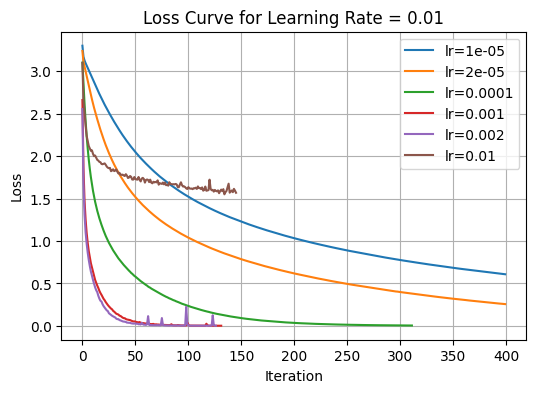

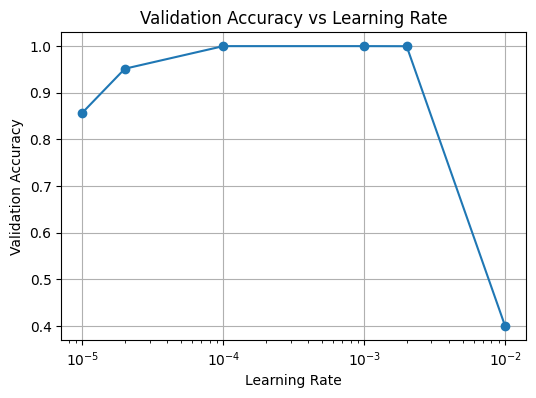

In [8]:
learning_rates = [1e-5,2e-5, 1e-4, 0.001,0.002, 0.01]

val_accs = []
plt.figure(figsize=(6,4))

for i, lr in enumerate(learning_rates):
    model = MLPClassifier(
        hidden_layer_sizes=(128,),
        learning_rate_init=lr,
        max_iter=400,
        random_state=42
    )

    model.fit(X_train, y_train)

    # Record metrics
    val_acc = model.score(X_validate, y_validate)
    f1_score_val = f1_score(y_validate, model.predict(X_validate), average='weighted')
    f1_scores.append(f1_score_val)
    val_accs.append(val_acc)

    print(f'Learning Rate: {lr}| Validation Accuracy: {val_acc:.4f}| F1-Score: {f1_score_val:.4f}| Total Iterations: {model.n_iter_}')

    # Plot the loss curve
    plt.plot(model.loss_curve_, label=f"lr={lr}")
    plt.title(f"Loss Curve for Learning Rate = {lr}")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

plt.show()

# Plot Validation Accuracy vs Learning Rate
plt.figure(figsize=(6,4))
plt.plot(learning_rates, val_accs, marker='o')
plt.xscale("log")
plt.xlabel("Learning Rate")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy vs Learning Rate")
plt.grid(True)
plt.show()


Learning Rate: 1e-06| Last Loss: 3.3598
Learning Rate: 1.181581732618102e-06| Last Loss: 3.3576
Learning Rate: 1.396135390856793e-06| Last Loss: 3.3551
Learning Rate: 1.6496480740980207e-06| Last Loss: 3.3521
Learning Rate: 1.9491940296028543e-06| Last Loss: 3.3488
Learning Rate: 2.303132058706996e-06| Last Loss: 3.3449
Learning Rate: 2.7213387683753086e-06| Last Loss: 3.3404
Learning Rate: 3.2154841769777028e-06| Last Loss: 3.3354
Learning Rate: 3.7993573650394055e-06| Last Loss: 3.3296
Learning Rate: 4.489251258218608e-06| Last Loss: 3.3231
Learning Rate: 5.304417279843926e-06| Last Loss: 3.3158
Learning Rate: 6.267602560047386e-06| Last Loss: 3.3077
Learning Rate: 7.405684692262442e-06| Last Loss: 3.2985
Learning Rate: 8.750421749906794e-06| Last Loss: 3.2883
Learning Rate: 1.0339338492393995e-05| Last Loss: 3.2774
Learning Rate: 1.221677348996793e-05| Last Loss: 3.2653
Learning Rate: 1.4435116387279175e-05| Last Loss: 3.2530
Learning Rate: 1.7056269831425284e-05| Last Loss: 3.2402


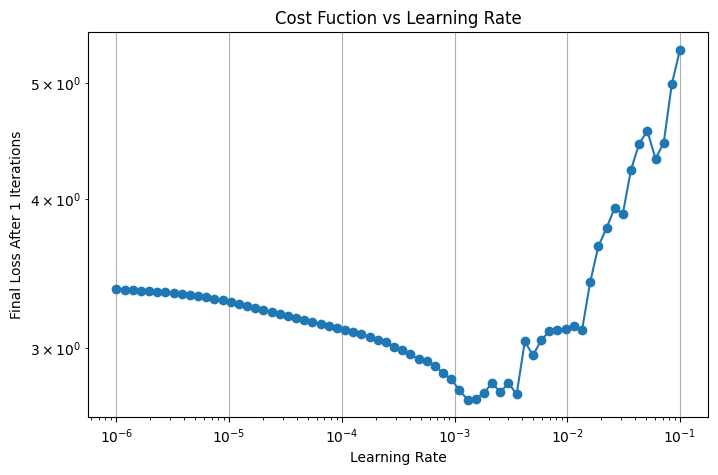

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

learning_rates = np.logspace(-6, -1, 70)   # from 1e-6 to 1e-1
losses = []

for lr in learning_rates:
    model = MLPClassifier(
        hidden_layer_sizes=(64,),
        learning_rate_init=lr,
        max_iter=1,              
        random_state=42,
        alpha=0.0001,               
        warm_start=False,
        verbose=False
    )
    model.fit(X_train, y_train)
    print(f'Learning Rate: {lr}| Last Loss: {model.loss_curve_[-1]:.4f}')
    

    # last loss value
    losses.append(model.loss_curve_[-1])

plt.figure(figsize=(8,5))
plt.plot(learning_rates, losses, marker='o')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Learning Rate")
plt.ylabel("Final Loss After 1 Iterations")
plt.title("Cost Fuction vs Learning Rate")
plt.grid(True)
plt.show()


Best lr = 1e-3 for hidden layer size = 64


Learning Rate: 1e-06| Last Loss: 3.4263
Learning Rate: 1.181581732618102e-06| Last Loss: 3.4224
Learning Rate: 1.396135390856793e-06| Last Loss: 3.4179
Learning Rate: 1.6496480740980207e-06| Last Loss: 3.4127
Learning Rate: 1.9491940296028543e-06| Last Loss: 3.4068
Learning Rate: 2.303132058706996e-06| Last Loss: 3.4001
Learning Rate: 2.7213387683753086e-06| Last Loss: 3.3924
Learning Rate: 3.2154841769777028e-06| Last Loss: 3.3838
Learning Rate: 3.7993573650394055e-06| Last Loss: 3.3742
Learning Rate: 4.489251258218608e-06| Last Loss: 3.3635
Learning Rate: 5.304417279843926e-06| Last Loss: 3.3518
Learning Rate: 6.267602560047386e-06| Last Loss: 3.3390
Learning Rate: 7.405684692262442e-06| Last Loss: 3.3253
Learning Rate: 8.750421749906794e-06| Last Loss: 3.3107
Learning Rate: 1.0339338492393995e-05| Last Loss: 3.2954
Learning Rate: 1.221677348996793e-05| Last Loss: 3.2800
Learning Rate: 1.4435116387279175e-05| Last Loss: 3.2648
Learning Rate: 1.7056269831425284e-05| Last Loss: 3.2494


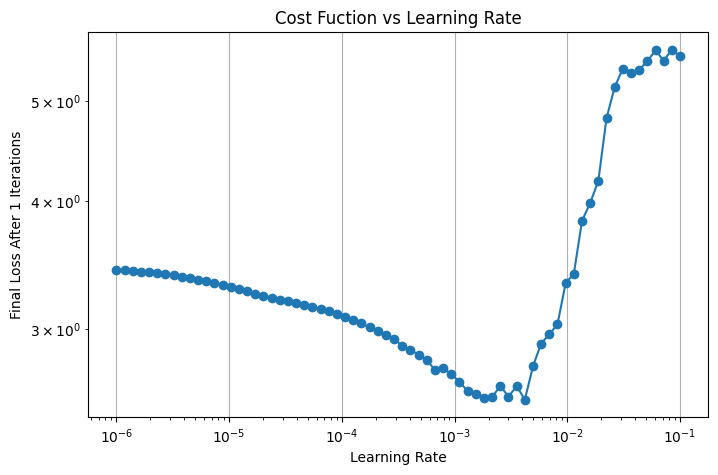

In [7]:

learning_rates = np.logspace(-6, -1, 70)   # from 1e-6 to 1e-1
losses = []

for lr in learning_rates:
    model = MLPClassifier(
        hidden_layer_sizes=(128,),
        learning_rate_init=lr,
        max_iter=1,              
        random_state=42,
        alpha=0.0001,               
        warm_start=False,
        verbose=False
    )
    model.fit(X_train, y_train)
    print(f'Learning Rate: {lr}| Last Loss: {model.loss_curve_[-1]:.4f}')
    

    # last loss value
    losses.append(model.loss_curve_[-1])

plt.figure(figsize=(8,5))
plt.plot(learning_rates, losses, marker='o')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Learning Rate")
plt.ylabel("Final Loss After 1 Iterations")
plt.title("Cost Fuction vs Learning Rate")
plt.grid(True)
plt.show()


Best lr = 2e-3 = 0.002 for hidden layer size = 128
